In [ ]:
# Importer biblioteker som trengs
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn import linear_model

In [ ]:
# Importerer datasettet
df = pd.read_csv('datasett.csv')

In [ ]:
# Tar en titt på dataen
df.head()

,documentDate,picturedate,lastchanged,adcreated,price,listprice,lat,lng,address,apartmentnumber,...,F_Turterreng,adtitle,N_modernisering,N_oppussing,N_regulert,N_garasjemulighet,postcode,Parking,price_inc_debt,area_id
0,2020-09-25,2020/7,2020-08-07,2020-08-03,5150000,4650000.0,59.913030,10.776672,"Hagegata 41, 0653 Oslo",H0703,...,NaN,VISNING AVLYST! Direkte bud til selger. Topple...,False,False,False,False,653,1,5150000.0,1
1,2020-09-29,2020/8,2020-12-14,2020-08-25,3900000,3650000.0,59.918900,10.647900,"Skogbrynet 16D, 0283 Oslo",U0101,...,1.0,Innbydende og lys 2-roms hjørneleilighet - Ves...,False,False,False,False,283,1,3944838.0,6
2,2021-12-02,2021/8,2021-08-01,2021-07-27,9900000,8750000.0,59.879000,10.799300,"Ringshusveien 8B, 1176 Oslo",H0101,...,1.0,Oppussingsobjekt - Enebolig i kjede med skjerm...,False,True,False,False,1176,1,9900000.0,14
3,2009-11-12,4/186,2009-09-05,2009-08-24,1660000,1680000.0,59.887690,10.802634,"Libakkfaret 1 A, 1184 Oslo",H0302,...,NaN,BRATTLIKOLLEN - Lys og gjennomgående 3-roms se...,False,False,False,False,1184,0,1678207.0,14
4,2012-10-24,2012/6,2012-06-15,2012-06-01,5760000,5490000.0,59.944653,10.888134,"Micheletveien 20, 1053 Oslo",U0102,...,NaN,GAMLE FURUSET - Velholdt og romslig enebolig m...,False,False,False,False,1053,0,5760000.0,12


In [ ]:
# Printer litt info om datasettet
print(f"Antall rader i datasettet: {len(df)}")
print(f"Antall kolonner i datasettet: {len(df.columns)}")
print()
print(df.columns)

Antall rader i datasettet: 181250
Antall kolonner i datasettet: 57

Index(['documentDate', 'picturedate', 'lastchanged', 'adcreated', 'price',
       'listprice', 'lat', 'lng', 'address', 'apartmentnumber',
       'apartmenttype', 'conveyancetype', 'finncode', 'BRA', 'PROM',
       'buildyear', 'matrikkel', 'bedrooms', 'rooms', 'bathrooms', 'WC',
       'elevator', 'floor', 'housingtype', 'commondebt', 'commoncosts',
       'F_Aircondition', 'F_Alarm', 'F_BalkongTerrasse', 'F_Barnevennlig',
       'F_Bredbåndstilknytning', 'F_Fellesvaskeri', 'F_GarasjeP-plass',
       'F_Heis', 'F_Ingen gjenboere', 'F_Lademulighet', 'F_Livsløpsstandard',
       'F_Moderne', 'F_Offentlig vannkloakk', 'F_Parkett', 'F_PeisIldsted',
       'F_Rolig', 'F_Sentralt', 'F_Utsikt', 'F_Vaktmester-vektertjeneste',
       'F_Bademulighet', 'F_Fiskemulighet', 'F_Turterreng', 'adtitle',
       'N_modernisering', 'N_oppussing', 'N_regulert', 'N_garasjemulighet',
       'postcode', 'Parking', 'price_inc_debt', 'area_id

In [ ]:
#df.info()
#df.describe()

In [ ]:
# Sjekker null-verdier
df.isnull().sum()

documentDate                        0
picturedate                       257
lastchanged                         0
adcreated                           0
price                               0
listprice                           0
lat                              1568
lng                              1568
address                             0
apartmentnumber                   822
apartmenttype                     792
conveyancetype                      0
finncode                            0
BRA                              3273
PROM                                0
buildyear                         925
matrikkel                           0
bedrooms                         9385
rooms                           51910
bathrooms                           0
WC                                  0
elevator                          792
floor                           37977
housingtype                         0
commondebt                      58689
commoncosts                     15759
F_Airconditi

Som vi kan se så finnes det null-verdier for flere av variablene. Dette er helt vanlig i større datasett og er et problem vi må gjøre noe med. Alle null-verdiene for variabler som starter med F_ (fasteliteter), vil bli kodet om til 0, da dette er dummy-variabler med 0 og 1 som verdi. Videre ser vi at rom og etasje er de to variablene med flest null-verdier (henholdsvis 51 910 og 37 977). Det finnes også et høyt antall null-verider for fellesgjeld og felleskostnader, men dette er knyttet til eneboliger og rekkehus hvor man ikke har disse kostnadene.

In [ ]:
df['housingtype'].value_counts()

Leilighet                157774
Enebolig                  10180
Rekkehus                   7491
Tomannsbolig               5638
Andre                        66
Tomter                       55
Bygård/Flermannsbolig        29
Annet fritid                  6
Garasje/Parkering             5
Gårdsbruk/Småbruk             2
business                      1
multipurposearea              1
warehouse                     1
Kontor                        1
Name: housingtype, dtype: int64

Vi starter med å se hvordan fordelingen av de ulike boligformene er i datasettet, og observerer at 87% av datapunktene i datasetter er leiligheter. I bydelene som er nærmest sentrum er over 90% av boliger leiligheter, mens i bydelene som ligger lengre borte fra sentrum er leilighetsandelen ned mot 40% på det laveste. Vi kan observere at det finnes 167 datapunkter som ikke er leilighet, enebolig, rekkehus eller tomannsbolig. Disse datapunktene vil ikke være relevante for oss så vi velger å utelate dem fra datasettet.

In [ ]:
feil_bolig = ['Andre','Tomter','Bygård/Flermannsbolig','Annet fritid','Garasje/Parkering','Gårdsbruk/Småbruk','Kontor','multipurposearea','warehouse','business']

for cat in feil_bolig:
    df.drop(df[df['housingtype'] == cat].index, inplace=True)

df['housingtype'].value_counts()


Leilighet       157774
Enebolig         10180
Rekkehus          7491
Tomannsbolig      5638
Name: housingtype, dtype: int64

Den neste variabelen vi skal se på er lengde/breddegrad variablene (lat,lng). Vi vet at Oslo ligger rundt breddegrad 59-60 og rundt lengdegrad 10. Dermed vil koordinater som avviker mye fra disse koordinatene være feil.

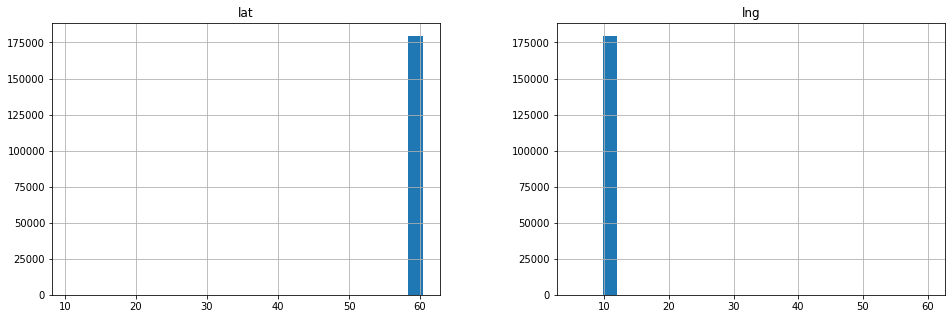

In [ ]:
df[['lat','lng']].hist(figsize=(16,5), bins=25)
plt.show()

Som vi ser så treffer alle koordinatene på Oslo-området. Vi skal nå ta en titt på null-verdiene til datapunktene.

In [ ]:
# Printer null-verdier for lat or lng
df[['lat','lng']].isnull().sum()

lat    1567
lng    1567
dtype: int64

Som vi kan se så har vi 1567 datapunkter som mangler lengde og breddegrader. En løsning vil da være å fjerne null-verdiene, men dette vil ikke være optimalt. Vi vil derfor prøve å finne koordinater for hver av de 16 bydelene, for deretter å erstatte null-verdiene med dette. Vi må derfor først lage koordinater for de 16 bydelene, for deretter å erstatte null-verdiene med disse. Koordinatene til bydelene vil være sentrum av bydelen.

In [ ]:
#Dictionary med bydeler (area_id) og tilsvarende koordinater til sentrum av bydelene
bydeler_koordinater = {1:[59.911832, 10.789224], 2:[59.923818, 10.771007],3:[59.938290, 10.764674],
4:[59.927053, 10.738491],5:[59.915947, 10.705421],6:[59.927271, 10.664877],7:[59.950695, 10.657639],
8:[59.956516, 10.766631],9:[59.937116, 10.820808],10:[59.954572, 10.876033],11:[59.958182, 10.924858],
12:[59.935980, 10.877371],13:[59.888390, 10.835148],14:[59.875677, 10.789629],15:[59.832622, 10.826528],
16:[59.910462, 10.737319]}

#Oppretter nye kolonner for lat/lng til bydelene
df['Bydel_lat'] = df['area_id']
df['Bydel_lng'] = df['area_id']

#Endrer fra area_id til koordinater for bydelene
for key, item in bydeler_koordinater.items():
    df['Bydel_lat'].mask(df['Bydel_lat'] == key, item[0], inplace=True)
    df['Bydel_lng'].mask(df['Bydel_lng'] == key, item[1], inplace=True)

#Legger til dummy-variabel hvis det finnes null-verdi
df['latlng_NA'] = (df['lat'].isna()).astype(int)

#Fyller inn null-verdier med tilsvarende koordinater for bydelene
df['lat'] = df['lat'].fillna(df['Bydel_lat'])
df['lng'] = df['lng'].fillna(df['Bydel_lng'])

Den neste variabelen vi skal se på er bruksareal (BRA). Det første vi må gjøre er å se på fordelingen for å kunne identifisere feil-verdier. BRA vil i de fleste tilfeller ligge mellom 50-100 for leiligheter, og 150-300 for større enebolig. Dette er det selvfølgelig unntak for med større leiligheter og boliger. Dermed vil det være vanskelig å skille mellom hva som er reelle store boliger, og hva som er feilverdier. En løsning er å fjerne verdier som er over 500 for eneboliger, rekkehus og tomannsboliger, hvis man har en pris som er under 10 000 000. Det er fordi boliger på >500 kvm vil så si alltid koste over 10 M. For leiligheter kan man fjerne verdier over 350 kvm hvis prisen er under 10M. Til slutt vil vi fjerne alle boliger med 1000 > BRA > 10 pga dette er åpenbare feildata etter å ha inspisert datapunktene.

 

In [ ]:
#Fjerner alle boliger med BRA>500 og pris<10 000 000
df.drop(df[(df['BRA'] > 500) & (df['price'] < 10000000)].index, inplace = True)
#Fjerner alle leiligheter med BRA>350 og pris<10 000 000
df.drop(df[(df['BRA'] > 350) & (df['housingtype'] == 'Leilighet') & (df['price'] < 10000000)].index, inplace = True)
#Fjerner alle boliger med BRA > 1000
df.drop(df[df['BRA'] > 1000].index, inplace = True)
#Fjerner alle boliger med BRA < 10 og PROM <10
df.drop(df[df['BRA'] < 10].index, inplace = True)
df.drop(df[df['PROM'] < 10].index, inplace = True)

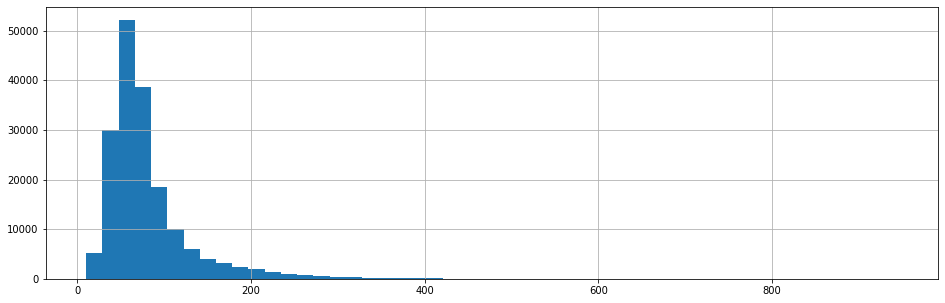

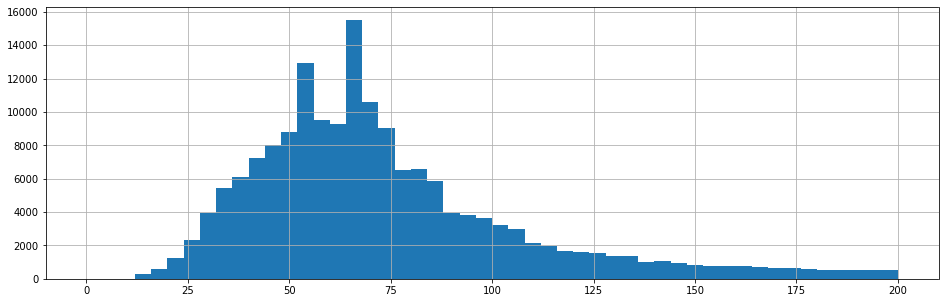

In [ ]:
#Printer histogram over fordelingen
df['BRA'].hist(bins=50, figsize=(16,5))
plt.show()
#Printer histogram over fordelingen mellom 0 og 200 kvm
df['BRA'].hist(bins=50, figsize=(16,5), range=[0,200])
plt.show()

Som vi kan se så er dataen høyreskjev, noe som vil være naturlig da det finnes langt flere små boliger. Videre må vi nå gjøre noe med null-verdiene. Siden BRA henger tett sammen med primærrom (PROM), så vil en brukbar løsning være å finne forholdet mellom disse variablene og deretter bruke det for å generere BRA hvor man ikke har dette oppgitt.

Det første vi gjør er å plotte forholdet mellom disse to variablene i et scatter-plot.

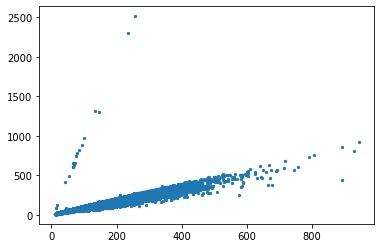

In [ ]:
plt.scatter(df['BRA'],df['PROM'], s=5)
plt.show()

Som vi kan se så virker det som om det er noen datapunkter hvor man har mikset opp PROM og BRA, da PROM alltid er mindre enn BRA. Dette er klare feilverdier og noe vi må fjerne. Videre vil vi finne sammenhengen mellom variablene ved bruk av linær regresjon.

In [ ]:
#Fjerner datapunkter hvor PROM > BRA
df.drop(df[df['PROM'] > df['BRA']].index, inplace=True)

#Lager en ny datafram uten null-verdier for BRA slik at man kan gjøre en linear regresjon
df_PROM_BRA = df[['PROM','BRA']]
df_PROM_BRA.dropna(axis=0, inplace=True)

#Definerer og tilpasser modellen
model = linear_model.LinearRegression()
model = model.fit(df_PROM_BRA[['PROM']], df_PROM_BRA[['BRA']])

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Printer ut R-scoren, koeffisientene og skjæringspunktet
skjæringspunktet = model.intercept_.astype(float)
koeffisienten = model.coef_[0].astype(float)

print(f"R^2 for modellen er: {model.score(df_PROM_BRA[['PROM']], df_PROM_BRA[['BRA']])*100:.4f}%") # R^2
print(f'Koeffisienten: {koeffisienten}')  # Koeffisient
print(f'Skjæringspiunktet: {skjæringspunktet:}') # Skjæringspunktet

#Erstatter alle null-verdier for BRA med tilhørende PROM * koeffisienten + skjæringspunktet
df['BRA'] = df['BRA'].fillna((skjæringspunktet + df['PROM']*koeffisienten))

R^2 for modellen er: 97.1854%
Koeffisienten: [1.1268646]
Skjæringspiunktet: [-6.25891293]


In [ ]:
df.head()

,documentDate,picturedate,lastchanged,adcreated,price,listprice,lat,lng,address,apartmentnumber,...,N_oppussing,N_regulert,N_garasjemulighet,postcode,Parking,price_inc_debt,area_id,Bydel_lat,Bydel_lng,latlng_NA
0,2020-09-25,2020/7,2020-08-07,2020-08-03,5150000,4650000.0,59.913030,10.776672,"Hagegata 41, 0653 Oslo",H0703,...,False,False,False,653,1,5150000.0,1,59.911832,10.789224,0
1,2020-09-29,2020/8,2020-12-14,2020-08-25,3900000,3650000.0,59.918900,10.647900,"Skogbrynet 16D, 0283 Oslo",U0101,...,False,False,False,283,1,3944838.0,6,59.927271,10.664877,0
2,2021-12-02,2021/8,2021-08-01,2021-07-27,9900000,8750000.0,59.879000,10.799300,"Ringshusveien 8B, 1176 Oslo",H0101,...,True,False,False,1176,1,9900000.0,14,59.875677,10.789629,0
3,2009-11-12,4/186,2009-09-05,2009-08-24,1660000,1680000.0,59.887690,10.802634,"Libakkfaret 1 A, 1184 Oslo",H0302,...,False,False,False,1184,0,1678207.0,14,59.875677,10.789629,0
4,2012-10-24,2012/6,2012-06-15,2012-06-01,5760000,5490000.0,59.944653,10.888134,"Micheletveien 20, 1053 Oslo",U0102,...,False,False,False,1053,0,5760000.0,12,59.935980,10.877371,0


Den neste variabelen vi skal se på er byggeår. Vi starter da med å få en oversikt over fordelingen av dataen. I datasettet vårt er de eldste boligene fra tidlig 1600 tallet. Modellen vår skal brukes til å predikere gjennomsnittlige boliger, og dermed vil det ikke være hensiktsmessig å ha med boliger bygget før  1800, da dette ikke går inn under en gjennomsnittlig bolig. De fleste av de eldste boligene i datasettet er ikke "vanlige" eiendommer, så dermed vil man få en mindre presis modell ved å inkludere disse. I tillegg vil vi få en svært høyreskjev fordeling.


I tillegg finnes det rett under 1000 null-verdier som vi velger å fjerne da det vil være vanskelig å beregne byggeår.

In [ ]:
#Fjerner alle boliger med byggeår < 1800
df.drop(df[df['buildyear'] < 1800].index, inplace = True)
#Fjerner null-verdier
df = df[df['buildyear'].notna()]
df['buildyear'].isnull().sum()

0

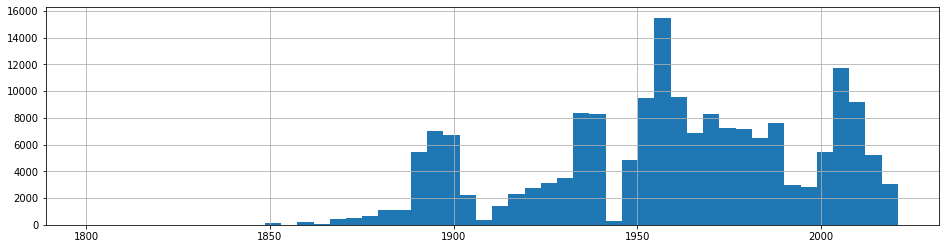

In [ ]:
df['buildyear'].hist(bins=50, figsize=(16,4))
plt.show()

Videre skal vi nå se på soverom og antall rom totalt. Hvordan er fordelingen, og hva må vi gjøre med eventuelle null-verdier?

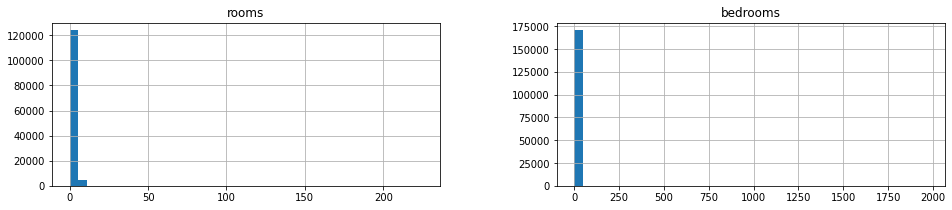

Antall null-verdier for 'rooms':    51246
Antall null-verdier for 'bedrooms': 9269


In [ ]:
df[['rooms','bedrooms']].hist(bins=40, figsize=(16,3)) #Printer fordeling i histogram
plt.show()
print(f"Antall null-verdier for 'rooms':    {df['rooms'].isnull().sum()}")
print(f"Antall null-verdier for 'bedrooms': {df['bedrooms'].isnull().sum()}")

Som vi kan se så finnes det helt klart noen feildata i begge kategoriene. I tillegg er det slik at vi har 51 345 null-verdier for antall rom. Dette tilsvarer rundt 30%, og er svært høyt. Løsningen for denne variabelen vil dermed bli å fjerne den helt, da det er såpass mange null-verdier.

For soverom så har vi 9 279 null-verdier. Dette er relativt høyt, men det er noe vi kan gjøre noe med. Det første vi gjør er å fjerne datapunkter med over 15 soverom da dette helt klart er feilverdier. Videre må vi finne en måte å håndtere null-verdiene på. Løsningen vi går for da er å bruke gjennomsnitt for antall soverom til å erstatte null-verdiene. (FORDEL ULEMPER VED DETTE). Vi så på muligheten for å koble det sammen med BRA eller PROM, men dette har en relativt liten korrelasjon, så det vil være en bedre løsning å bruke gjennomsnitt.

In [ ]:
#Fjerner soverom > 15
df.drop(df[df['bedrooms'] >15].index, inplace = True)

#Erstatter null-verdier med gjennomsnitt og lager dummy-variabel ved null-verdi
df['bedrooms_NA'] = (df['bedrooms'].isna()).astype(int)
df['bedrooms'].fillna(df['bedrooms'].mean(), inplace=True)

#Fjerner "rooms"-variabelen
df.drop('rooms',inplace=True, axis=1)

Vi har nå fått fikset opp i de variablene, og videre skal vi se på hvordan fordelingen av "bathrooms" og "WC" er. Fra før av har vi fått oppgitt at variabelen "bathrooms" er svært mangelfull, og vanskelig å verifisere. For eksempel finnes det rundt 40 000 datapunkter med 0 som antall bad. Dette er tvilsomme data og når man i tillegg da har rundt 10 000 null-verdier for denne variabelen gjør det at vi velger å fjerne den helt.

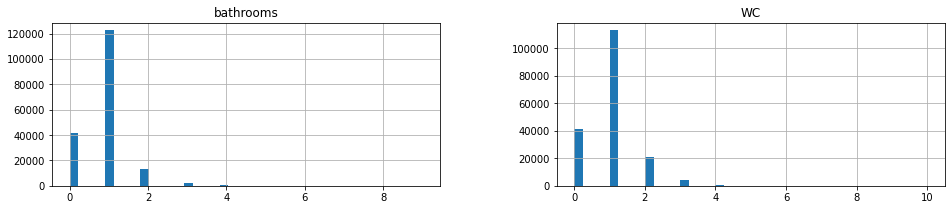

In [ ]:
df[['bathrooms','WC']].hist(bins=40, figsize=(16,3)) #Printer fordeling i histogram
plt.show()

In [ ]:
df.drop(df['bathrooms'], inplace=True)

Den neste variabelen vi skal se på er heis-variabelen. Som vi kan se fra listen over variabler, så er det også en fastelitetsvariabel på heis (F_Heis). Disse henger tett sammen, men for rundt 5 000 datapunkter så er det ulik verdi. Vi velger derfor å fjerne "F_Heis", og gå videre med "elevator" variabelen.

For "elevator" så er verdiene kodet som J/N, altså ikke numerisk. Dette vil vi transformere til 1/0. Videre kan vi også observere at det er 783 nullverdier. Disse vil vi omkode til 0.

Det er også viktig å huske på at heis-variabelen bare er relevant i leiligheter, da de fleste eneboliger ikke har bruk for heis.

In [ ]:
#Printer fordelingen på de to heis-variablene
print(df['elevator'].value_counts())
print(df['F_Heis'].value_counts())

#Fjerner F_Heis
df.drop('F_Heis',inplace=True,axis=1)

#Gjør om til numerisk binær variabel (1/0)
df['elevator'].replace({'J':1,'N':0}, inplace=True)

#Koder om null-verdier til 0
df['elevator'] = df['elevator'].fillna(0)

N    123474
J     55521
Name: elevator, dtype: int64
1.0    50900
Name: F_Heis, dtype: int64


Videre kan vi nå se på variabelen etasjer ('floor'). Der har vi rundt 37 000 null-verdier. I og med at etasje bare er relevant for leiligheter (da det går på etasje for leiligheter og ikke antall etasjer i huset), så er rundt 20 000 av null-verdiene fra andre typer boliger enn leiligheter. Dermed har vi rundt 17 000 null-verdier for leilighetene. Vi løser dette med å erstatte alle null-verdiene med gjennomsnittet, samt legge til en binær variabel som sier om vi har erstattet null-verdi eller ikke.

In [ ]:
#Fjerner åpenbare feilverdier
df.drop(df[df['floor'] >20].index, inplace = True)

#Sjekker hvor stor del av boligene som ikke er leiligheter som har null-verdi for etasje-variabelen
print(df.loc[df['housingtype'] != 'Leilighet','floor'].isna().value_counts())

#Erstatter alle null-verdier med gjennomsnitt og legger til en dummy-variabel
df['floor_NA'] = (df['floor'].isna()).astype(int)
df['floor'] = df['floor'].fillna(df['floor'].mean())

True     20757
False     2383
Name: floor, dtype: int64


Denne løsningen vil også være relevant for variablene fellesgjeld og felleskostnader, da dette også er variabler som for det meste bare er relevant for leiligheter. Men for disse variablene så vil vi erstatte null-verdier med 0, da det er mest sannsynlig slik at boliger uten oppgitt felleskostnader/fellesgjeld ikke har dette.

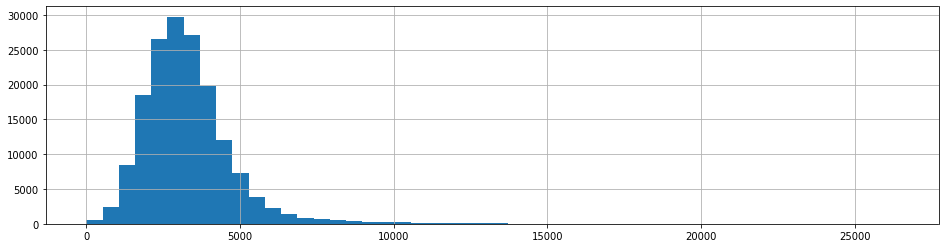

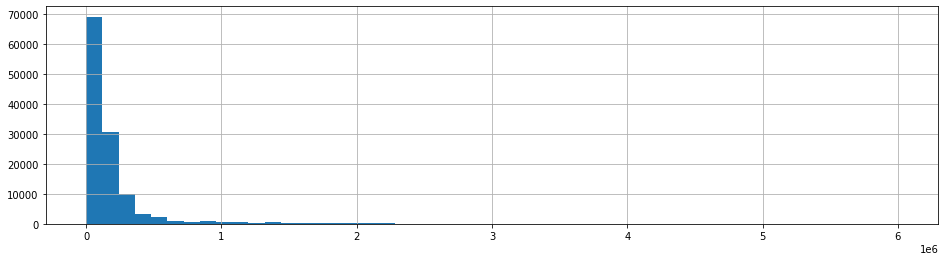

In [ ]:
#Printer fordelingen
df['commoncosts'].hist(bins=50, figsize=(16,4))
plt.show()
df['commondebt'].hist(bins=50, figsize=(16,4))
plt.show()

In [ ]:
#Erstatter alle null-verdier med 0 og legger til en dummy-variabel
df['commondebt_NA'] = (df['commondebt'].isna()).astype(int)
df['commondebt'] = df['commondebt'].fillna(0)
df['commoncosts_NA'] = (df['commoncosts'].isna()).astype(int)
df['commoncosts'] = df['commoncosts'].fillna(0)

De neste variablene vi skal se på nå er alle som starter med "F_". Dette er fasteliteter man kan oppgi i finn-annonsen og er binært 1/0. Som vi har sett så er det svært mye null-verdier i disse variablene, men dette er fordi alle boliger uten den gitte fasteliteten vil få null-verdi og ikke "0" i datasettet. Dermed må vi kode om alle variablene slik at null-verdiene erstattes av 0.

I tillegg er det slik at en del av disse variablene ikke vil være så veldig nyttige, da nesten alle er 0 eller finn-fasteliteten ikke blir brukt av megler (for eksempel hvis det finnes alarm men megleren ikke markerer det i annonnsen).

In [ ]:
fasteliteter_liste = ['F_Aircondition', 'F_Alarm', 'F_BalkongTerrasse', 'F_Barnevennlig',
'F_Bredbåndstilknytning', 'F_Fellesvaskeri', 'F_GarasjeP-plass', 'F_Ingen gjenboere', 'F_Lademulighet',
'F_Livsløpsstandard', 'F_Moderne', 'F_Offentlig vannkloakk', 'F_Parkett', 'F_PeisIldsted', 'F_Rolig',
'F_Sentralt', 'F_Utsikt', 'F_Vaktmester-vektertjeneste', 'F_Bademulighet', 'F_Fiskemulighet', 'F_Turterreng']

#Erstatter null-verdier med 0 for hver kategori i listen
for cat in fasteliteter_liste:
    df[cat] = df[cat].fillna(0)

In [ ]:
df.isnull().sum()

documentDate        0
picturedate       247
lastchanged         0
adcreated           0
price               0
                 ... 
latlng_NA           0
bedrooms_NA         0
floor_NA            0
commondebt_NA       0
commoncosts_NA      0
Length: 62, dtype: int64

In [ ]:
df.head()

,documentDate,picturedate,lastchanged,adcreated,price,listprice,lat,lng,address,apartmentnumber,...,Parking,price_inc_debt,area_id,Bydel_lat,Bydel_lng,latlng_NA,bedrooms_NA,floor_NA,commondebt_NA,commoncosts_NA
10,2019-05-06,2019/2,2019-02-15,2019-01-25,8450000,7800000.0,59.873753,10.808472,"Radarveien 78 C, 1163 Oslo",H0201,...,1,8450000.0,14,59.875677,10.789629,0,0,0,1,0
11,2012-09-04,2012/8,2019-02-24,2012-08-08,2400000,1990000.0,59.943737,10.774553,"Grefsenveien 30 A, 0485 Oslo",H0403,...,1,2564865.0,3,59.938290,10.764674,0,0,0,0,0
12,2014-05-21,2014/2,2014-03-01,2014-02-15,5775000,5690000.0,59.934540,10.796455,"Liljeveien 15, 0585 Oslo",H0101,...,1,5775000.0,2,59.923818,10.771007,0,0,1,1,1
13,2013-11-12,2013/8,2013-09-13,2013-08-21,21000000,24000000.0,59.952496,10.686596,"Bjørnveien 53, 0774 Oslo",H0101,...,1,21000000.0,7,59.950695,10.657639,0,0,1,1,1
14,2020-11-05,2020/5,2020-06-17,2020-05-02,13500000,15000000.0,59.908840,10.853329,"Trasoppterrassen 3A, 0684 Oslo",H0101,...,1,13500000.0,13,59.888390,10.835148,0,0,1,1,1


**Andreas: Først lage nye variabler, typ kvadratmeterpris (ut fra prisantydning), måned for annonse, renten osv. Deretter avgrense dataen på byggeår, kvadratmeter og pris. Og så lage en ny dataframe hvor man utelater variabler man ikke skal bruke.**

**Morten/Silje: Videre vil visualisering være relevant (Seaborn)**

**Deretter eksprimentere med modeller (ANN/Reresjon).**

Vi er nå ferdig med å fjerne null-verdier og renske dataen. Det vi vil gjøre videre er å generere nye variabler basert på de gamle variablene, samt lage et nytt datasett bestående kun av de variablene vi skal bruke. I tillegg vil vi begrense noen variabler for å få data som gir oss en mer presis modell.

Vi starter med å lage to nye variabler. En variabel som sier hvilken måned annonsen ble laget, og en som sier gir oss en kvadratmeterpris ut fra prisantydning.

In [ ]:
#Genererer måned-variabel ut fra "adcreated"
df['måned_annonse'] = df['adcreated'].str[5:7].astype(int)

#Genererer kvadratmeterpris ut fra PROM og prisantydning
df['kvm_prisantydning'] = (df['listprice']/df['PROM']).round(2)

In [ ]:
#Lager en kopi av dataen
df_copy = df.copy()

print(f"Antall datapunkter før begrensning: {len(df)}")

#Begrenser byggeår til minimum 1850
df.drop(df[df['buildyear'] < 1850].index, inplace = True)
#Begrenser PROM for leiligheter til maximum 250
df.drop(df[(df['BRA'] > 250) & (df['housingtype'] == 'Leilighet')].index, inplace = True)
#Begrenser PROM for enebolig, rekkehus og tomannsbolig til maximum 400
df.drop(df[df['BRA'] > 400].index, inplace = True)
#Begrenser pris til å være maksimum 20 millioner
df.drop(df[df['listprice'] > 20000000].index, inplace = True)

print(f"Antall datapunkter etter begrensning: {len(df)}")

Antall datapunkter før begrensning: 179772
Antall datapunkter etter begrensning: 178897


Vi har nå begrenset dataen slik at vi fjerner "ekstreme" boliger og gjør modellen vår mer treffsikker. Videre vil vi fjerne de variablene vi ikke skal benytte i modellen vår.

In [ ]:
variabler = ['adcreated', 'price', 'listprice', 'lat', 'lng', 'finncode', 'BRA', 'PROM', 'buildyear', 
'bedrooms', 'WC', 'elevator', 'floor', 'housingtype', 'commondebt', 'commoncosts', 'F_BalkongTerrasse',
'F_Barnevennlig', 'F_Bredbåndstilknytning', 'F_Fellesvaskeri', 'F_GarasjeP-plass', 'F_Ingen gjenboere',
'F_Lademulighet', 'F_Livsløpsstandard', 'F_Moderne', 'F_Offentlig vannkloakk', 'F_Parkett', 'F_PeisIldsted',
'F_Rolig', 'F_Sentralt', 'F_Utsikt', 'F_Vaktmester-vektertjeneste', 'F_Turterreng', 'postcode', 'Parking',
'price_inc_debt', 'area_id', 'latlng_NA', 'bedrooms_NA', 'floor_NA',
'commondebt_NA', 'commoncosts_NA', 'måned_annonse', 'kvm_prisantydning']

#Printer litt statistikk:
var_før_begrensning = len(df.columns)
df = df[variabler]
var_etter_begrensning = len(df.columns)
print(f"Antall variabler før begrensning: {var_før_begrensning}\nAntall variabler etter begrensning: {var_etter_begrensning}\nFjernet {var_før_begrensning-var_etter_begrensning} variabler.")

df.head()

Antall variabler før begrensning: 44
Antall variabler etter begrensning: 44
Fjernet 0 variabler.


,adcreated,price,listprice,lat,lng,finncode,BRA,PROM,buildyear,bedrooms,...,Parking,price_inc_debt,area_id,latlng_NA,bedrooms_NA,floor_NA,commondebt_NA,commoncosts_NA,måned_annonse,kvm_prisantydning
10,2019-01-25,8450000,7800000.0,59.873753,10.808472,138940366,113.000000,113.0,2012.0,3.0,...,1,8450000.0,14,0,0,0,1,0,1,69026.55
11,2012-08-08,2400000,1990000.0,59.943737,10.774553,36454379,46.000000,46.0,1935.0,1.0,...,1,2564865.0,3,0,0,0,0,0,8,43260.87
12,2014-02-15,5775000,5690000.0,59.934540,10.796455,46728572,150.375267,139.0,1937.0,3.0,...,1,5775000.0,2,0,0,1,1,1,2,40935.25
15,2018-05-31,2950000,2600000.0,59.911300,10.777734,121536606,34.000000,34.0,1899.0,1.0,...,0,3004525.0,1,0,0,0,0,0,5,76470.59
16,2020-10-11,3650000,3450000.0,59.900898,10.777195,193783344,46.000000,46.0,1938.0,1.0,...,0,3761610.0,1,0,0,0,0,0,10,75000.00


False    178201
True        696
Name: N_garasjemulighet, dtype: int64

In [ ]:
df_latlng = df.copy()

In [ ]:
df_latlng.drop(df[df["lat"] < 59.8].index, inplace=True)
df_latlng.drop(df[df["lat"] > 59.98].index, inplace=True)

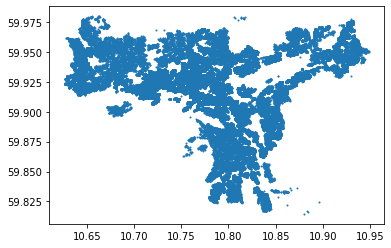

In [ ]:
plt.scatter(df_latlng["lng"],df_latlng["lat"], s=1)
plt.show()

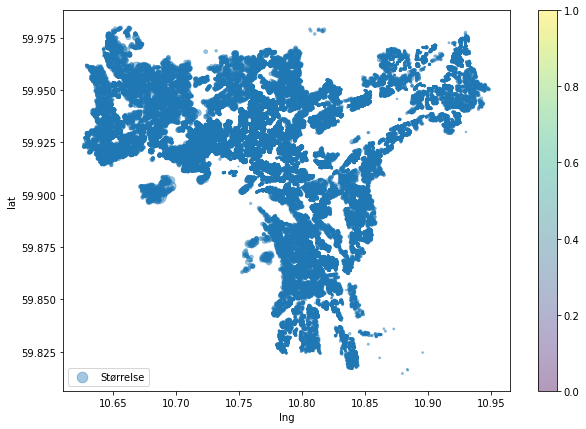

In [ ]:
df_latlng.plot(kind = "scatter", 
                x = "lng", 
                y = "lat", 
                alpha = 0.4,                        # blending value, between 0 (transparent) and 1 (opaque).
                s = df_latlng["price"]/1000000,   # The marker size according to population
                label = "Størrelse",               # The label of the timeseries used in legend  
                figsize = (10,7),                   # Figure size
                #c = "price",           # color dependent on feature house value
                cmap = plt.get_cmap("jet"),         # color map in case that c is an array of floats
                colorbar = True,
                sharex = False)                     #  each subplot x- or y-axis will be independent  

plt.legend()
plt.show()


# Try to put an error into cmap then you get a suggestion of all the possibilities


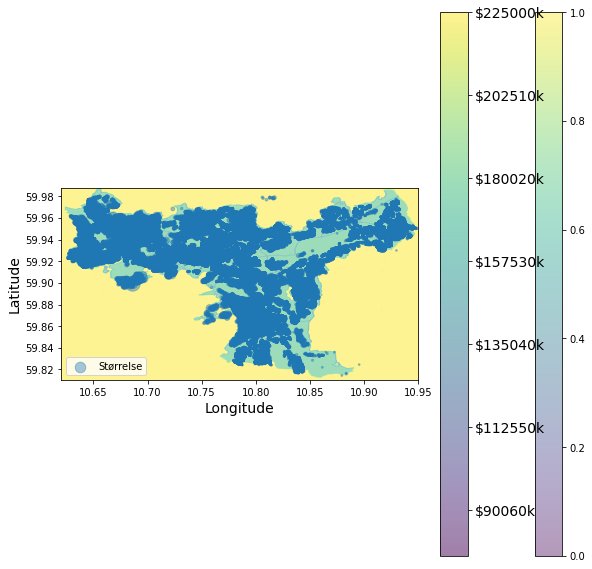

In [ ]:
oslo_img=mpimg.imread('oslo.png')

ax = df_latlng.plot(kind = "scatter", 
                x = "lng", 
                y = "lat", 
                alpha = 0.4,                        # blending value, between 0 (transparent) and 1 (opaque).
                s = df_latlng["price"]/1000000,   # The marker size according to population
                label = "Størrelse",               # The label of the timeseries used in legend  
                figsize = (10,10),                   # Figure size
                #c = "price",           # color dependent on feature house value
                cmap = plt.get_cmap("jet"),         # color map in case that c is an array of floats
                colorbar = True,
                sharex = False)  

plt.imshow(oslo_img,
           extent=[10.62, 10.95, 59.81, 59.988],
           alpha=0.5,
           #cmap=plt.get_cmap("jet")
           )
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = df_latlng["price"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
#cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=10)

plt.show()

In [ ]:
df.head()

,documentDate,picturedate,lastchanged,adcreated,price,listprice,lat,lng,address,apartmentnumber,...,area_id,Bydel_lat,Bydel_lng,latlng_NA,bedrooms_NA,floor_NA,commondebt_NA,commoncosts_NA,måned_annonse,kvm_prisantydning
10,2019-05-06,2019/2,2019-02-15,2019-01-25,8450000,7800000.0,59.873753,10.808472,"Radarveien 78 C, 1163 Oslo",H0201,...,14,59.875677,10.789629,0,0,0,1,0,1,69026.55
11,2012-09-04,2012/8,2019-02-24,2012-08-08,2400000,1990000.0,59.943737,10.774553,"Grefsenveien 30 A, 0485 Oslo",H0403,...,3,59.938290,10.764674,0,0,0,0,0,8,43260.87
12,2014-05-21,2014/2,2014-03-01,2014-02-15,5775000,5690000.0,59.934540,10.796455,"Liljeveien 15, 0585 Oslo",H0101,...,2,59.923818,10.771007,0,0,1,1,1,2,40935.25
13,2013-11-12,2013/8,2013-09-13,2013-08-21,21000000,24000000.0,59.952496,10.686596,"Bjørnveien 53, 0774 Oslo",H0101,...,7,59.950695,10.657639,0,0,1,1,1,8,67796.61
14,2020-11-05,2020/5,2020-06-17,2020-05-02,13500000,15000000.0,59.908840,10.853329,"Trasoppterrassen 3A, 0684 Oslo",H0101,...,13,59.888390,10.835148,0,0,1,1,1,5,33112.58


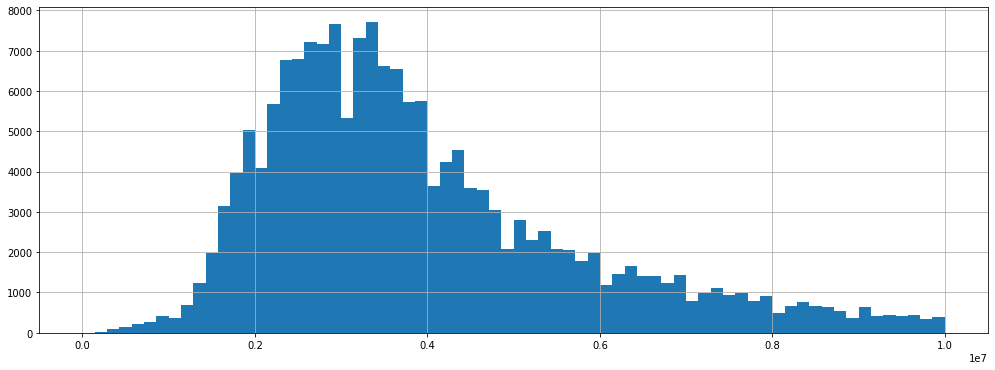

In [ ]:
df['price'].hist(bins=70, range=[0,10000000], figsize=(17,6))
plt.show()

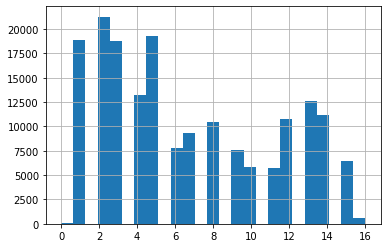

In [ ]:
df["area_id"].hist(bins=25)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7a076037-bdbc-4d12-92b5-75ebface7fab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>